In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
df=pd.read_csv("C:/Users/abhak/Documents/credit_card_fraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
fraud=df.loc[df['Class']==1]
normal=df.loc[df['Class']==0]

In [12]:
fraud.count()

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

In [13]:
len(fraud)

492

In [14]:
len(normal)

284314

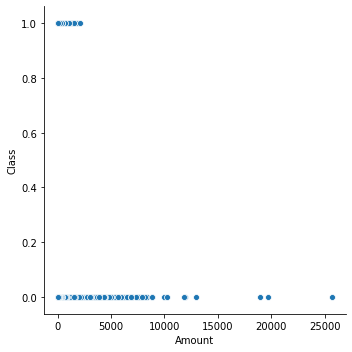

In [15]:
sns.relplot(x='Amount',y='Class',data=df)

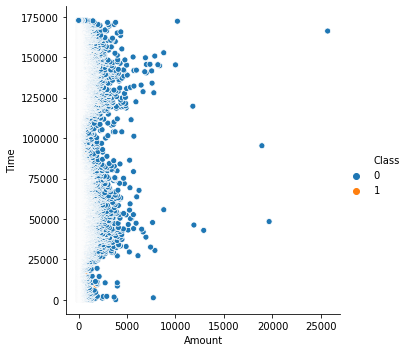

In [16]:
sns.relplot(x='Amount',y='Time',hue="Class",data=df)

In [18]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [19]:
x=df.iloc[:,:-1]
y=df['Class']

x_train,x_test,y_train,y_test,= train_test_split(x,y,test_size=.35)

In [23]:
clf=linear_model.LogisticRegression(C=1e5)

In [24]:
clf.fit(x_train,y_train)

C:\Users\abhak\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0)

In [25]:
y_pred=np.array(clf.predict(x_test))
y=np.array(y_test)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [28]:
print(confusion_matrix(y,y_pred))

[[99442    63]
 [   53   125]]


In [30]:
print(accuracy_score(y,y_pred))

0.9988363111062066


In [31]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99505
           1       0.66      0.70      0.68       178

    accuracy                           1.00     99683
   macro avg       0.83      0.85      0.84     99683
weighted avg       1.00      1.00      1.00     99683



In [33]:
a=[[1,-0.966271712,-0.185226008,1.79299334,-0.863291275,-0.01030888,1.247203168,0.23760894,0.377435875,-1.387024063,-0.054951922,-0.226487264,0.178228226,0.50775687,-0.287923745,-0.631418118,-1.059647245,-0.684092786,1.965775003,-1.23262197,-0.208037781,-0.108300452,0.005273597,-0.190320519,-1.175575332,0.647376035,-0.221928844,0.062722849,0.061457629,123.5]]
#a=s.transform(a)
b=clf.predict(a)

In [34]:
b
#predicted corectly

array([0], dtype=int64)

In [36]:
data=df.sample(frac=0.1,random_state=1)
print(data.shape)

(28481, 31)


NameError: name 'plt' is not defined

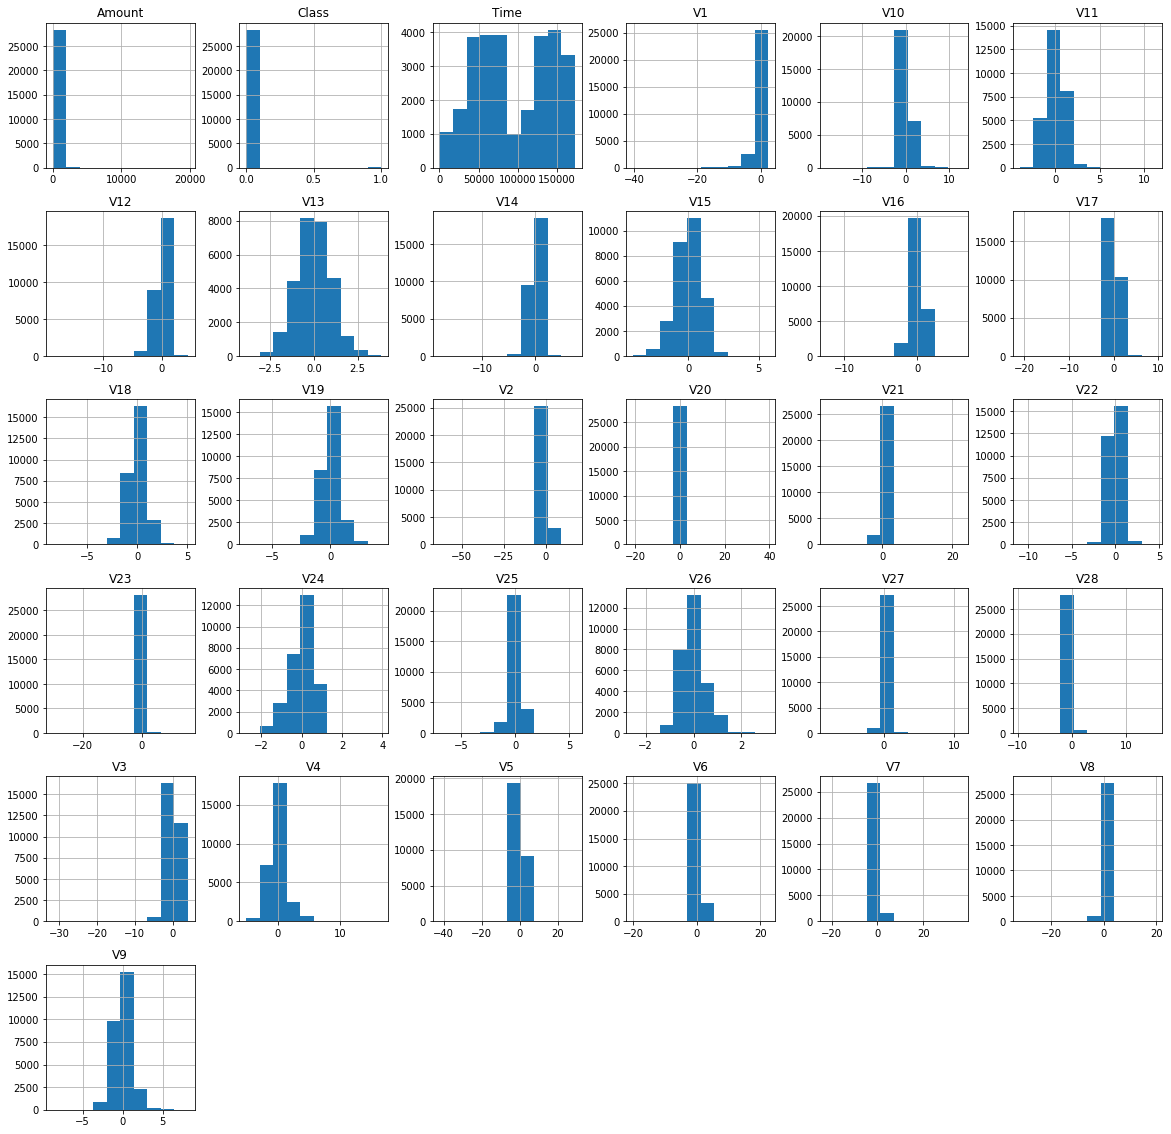

In [39]:
data.hist(figsize=(20,20))
plt.show()